In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = True)
X = mnist.train.images

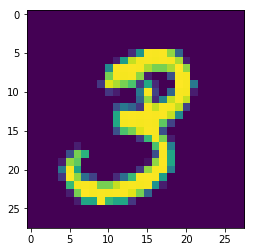

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X[1].reshape(28,28))

In [5]:
# 784 -> 128 -> 64 -> 128 -> 784

In [6]:
# encoder
neuronios_entrada = 784
neuronios_oculta1 = 128

# dado/imagem codificada
neuronios_oculta2 = 64

# decoder
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = neuronios_entrada

In [7]:
import tensorflow as tf
tf.reset_default_graph()

In [8]:
xph = tf.placeholder(tf.float32, [None, neuronios_entrada])

In [10]:
# Xavier: sigmoid
# He: relu
inicializador = tf.variance_scaling_initializer()

In [12]:
# 784 -> 128 -> 64 -> 128 -> 784
W = {'encoder_oculta1': tf.Variable(inicializador([neuronios_entrada, neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta1, neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta2, neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_oculta3, neuronios_saida]))
}

In [13]:
b = {'encoder_oculta1': tf.Variable(inicializador([neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_saida]))
}

In [15]:
camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(xph, W['encoder_oculta1']), b['encoder_oculta1']))
camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, W['encoder_oculta2']), b['encoder_oculta2']))
camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, W['decoder_oculta3']), b['decoder_oculta3']))
camada_saida = tf.nn.relu(tf.add(tf.matmul(camada_oculta3, W['decoder_saida']), b['decoder_saida']))

In [16]:
erro = tf.losses.mean_squared_error(xph, camada_saida)
otimizador = tf.train.AdamOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
batch_size = 128

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(50):
        numero_batches = mnist.train.num_examples // batch_size
        for i in range(numero_batches):
            X_batch, _ = mnist.train.next_batch(batch_size)
            custo, _ = sess.run([erro, treinamento], feed_dict = {xph: X_batch})
        print('época: ' + str(epoca + 1) + ' erro: ' + str(custo))
    
    imagens_codificadas = sess.run(camada_oculta2, feed_dict = {xph: X})
    imagens_decodificadas = sess.run(camada_saida, feed_dict = {xph: X})

época: 1 erro: 0.01952338
época: 2 erro: 0.015600423
época: 3 erro: 0.013935093
época: 4 erro: 0.014563898
época: 5 erro: 0.013964899
época: 6 erro: 0.013490865
época: 7 erro: 0.013128604
época: 8 erro: 0.013369382
época: 9 erro: 0.01362943
época: 10 erro: 0.012102664
época: 11 erro: 0.012654931
época: 12 erro: 0.012730897
época: 13 erro: 0.012801492
época: 14 erro: 0.012998333
época: 15 erro: 0.012159527
época: 16 erro: 0.0123996725
época: 17 erro: 0.012291718
época: 18 erro: 0.011834145
época: 19 erro: 0.0126852505
época: 20 erro: 0.012416426
época: 21 erro: 0.012731731
época: 22 erro: 0.012747558
época: 23 erro: 0.012219922
época: 24 erro: 0.012782447
época: 25 erro: 0.012429545
época: 26 erro: 0.011658542
época: 27 erro: 0.011890365
época: 28 erro: 0.013420635
época: 29 erro: 0.012250601
época: 30 erro: 0.0120607605
época: 31 erro: 0.011922376
época: 32 erro: 0.01317529
época: 33 erro: 0.012731505
época: 34 erro: 0.012694549
época: 35 erro: 0.013091166
época: 36 erro: 0.012353379
é

In [19]:
imagens_codificadas.shape

(55000, 64)

In [20]:
imagens_codificadas[0]

array([1.2247293 , 1.9721667 , 0.        , 2.6012943 , 0.        ,
       1.3958687 , 2.0767071 , 0.        , 0.        , 1.2540141 ,
       0.87828535, 1.7531288 , 1.9255728 , 0.        , 1.3608403 ,
       0.        , 1.5699751 , 0.        , 0.        , 1.5707343 ,
       2.0978467 , 1.5079731 , 1.1023841 , 2.4627476 , 0.        ,
       2.0786014 , 0.        , 1.3541212 , 1.3184564 , 0.        ,
       0.        , 0.        , 0.7733691 , 0.        , 0.4092394 ,
       1.1147168 , 0.3444962 , 2.2417314 , 0.7914021 , 0.8660021 ,
       1.8022761 , 0.        , 2.2558904 , 1.774883  , 1.4006109 ,
       0.        , 0.8422859 , 1.9406065 , 2.2699819 , 0.9662199 ,
       0.        , 0.        , 1.04002   , 0.8063988 , 1.0067446 ,
       0.        , 0.        , 1.2923586 , 2.4976656 , 0.        ,
       1.3065418 , 1.4977047 , 0.985443  , 2.2792354 ], dtype=float32)

In [21]:
imagens_decodificadas.shape

(55000, 784)

In [22]:
imagens_decodificadas[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
import numpy as np
numero_imagens = 5
imagens_teste = np.random.randint(X.shape[0], size = numero_imagens)
imagens_teste

array([11040,  3873, 18453, 33781, 44487])

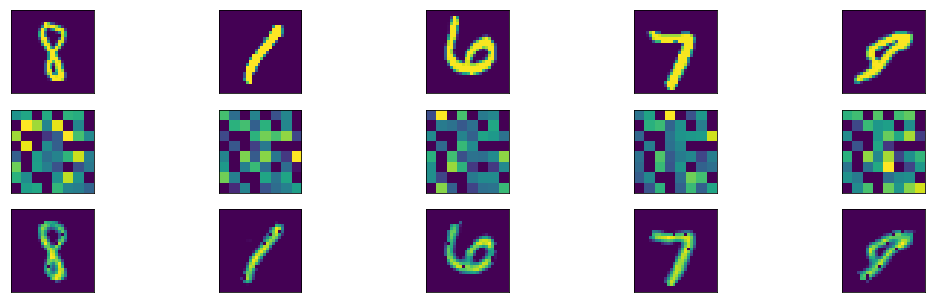

In [53]:
plt.figure(figsize = (18, 18))
for i, indice_imagem in enumerate(imagens_teste):
    #print(i)
    #print(indice_imagem)
    eixo = plt.subplot(10, 5, i + 1)
    plt.imshow(X[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
    eixo = plt.subplot(10, 5, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8, 8))
    plt.xticks(())
    plt.yticks(())
    
    eixo = plt.subplot(10, 5, i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())
    
    